In [1]:
push!(LOAD_PATH, joinpath(@__DIR__, "../../../lib"));

In [2]:
using OrdinaryDiffEq

In [3]:
include("dress-crosstalk.jl");

In [4]:
const sys0 = ThreeLevel();

In [5]:
function blackman_profile(amp, len)
    function cb(t)
        if t > len
            return 0.0
        end
        θ = t * (2pi / len) - pi
        return amp * evalpoly(cos(θ), (0.34, 0.5, 0.16))
    end
end

blackman_profile (generic function with 1 method)

### $100 \mu s$ $\pi$-time Blackman

  2.903463 seconds (20.88 M allocations: 1.146 GiB, 15.98% gc time, 99.87% compilation time)


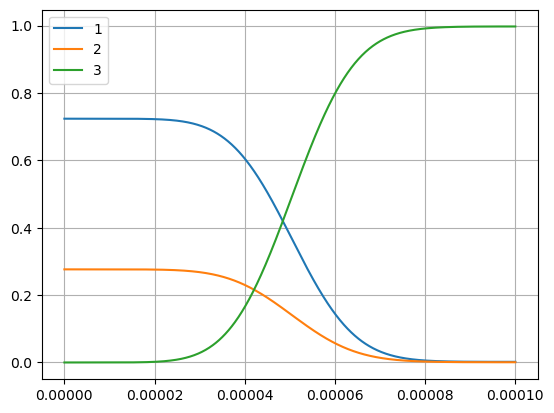

In [6]:
ts, ψs = @time evolve_dressed(sys0, false, 2π * 85e3, 2π * 170e3, 2π * -137e3,
                              blackman_profile(2π * 22e3, 100e-6), range(0, 100e-6, 1001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
plot(ts, [abs2(ψ.data[3]) for ψ in ψs], label="3")
legend()
grid()

### Off resonant coupling from $100 \mu s$ $\pi$-time Blackman

  0.000480 seconds (6.53 k allocations: 355.594 KiB)


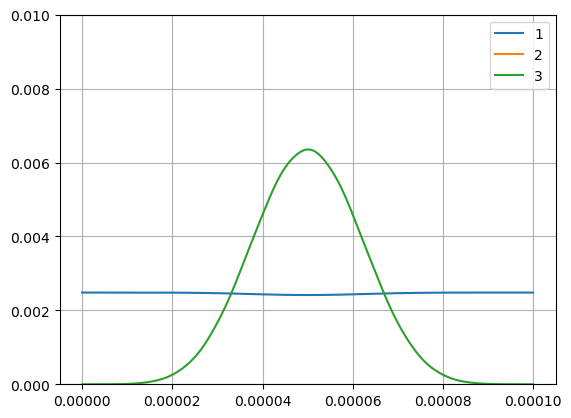

In [7]:
ts, ψs = @time evolve_dressed(sys0, true, 2π * 85e3, 2π * 170e3 * 0.05, 2π * -137e3,
                              blackman_profile(2π * 22e3, 100e-6), range(0, 100e-6, 1001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
plot(ts, [abs2(ψ.data[3]) for ψ in ψs], label="3")
legend()
ylim([0., 0.01])
grid()

### $40 \mu s$ $\pi$-time Blackman

  0.000431 seconds (6.04 k allocations: 334.203 KiB)


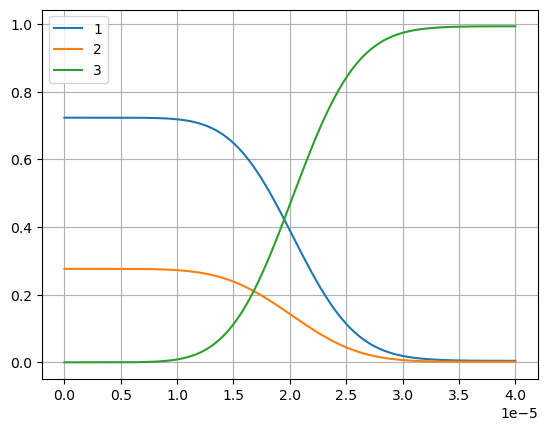

In [8]:
ts, ψs = @time evolve_dressed(sys0, false, 2π * 85e3, 2π * 170e3, 2π * -137e3,
                              blackman_profile(2π * 55e3, 40e-6), range(0, 40e-6, 1001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
plot(ts, [abs2(ψ.data[3]) for ψ in ψs], label="3")
legend()
grid()

### Off resonant coupling from $40 \mu s$ $\pi$-time Blackman

  0.000355 seconds (4.78 k allocations: 279.219 KiB)


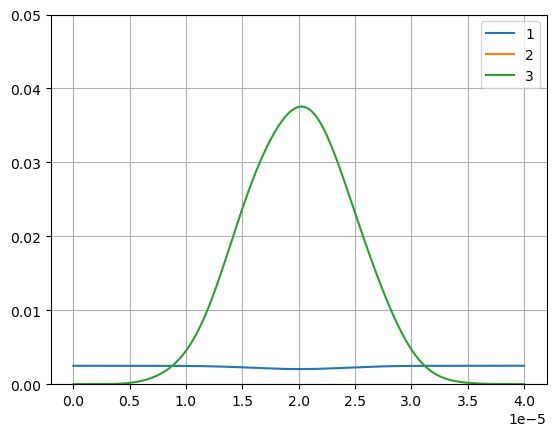

In [9]:
ts, ψs = @time evolve_dressed(sys0, true, 2π * 85e3, 2π * 170e3 * 0.05, 2π * -137e3,
                              blackman_profile(2π * 55e3, 40e-6), range(0, 40e-6, 1001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
plot(ts, [abs2(ψ.data[3]) for ψ in ψs], label="3")
legend()
ylim([0., 0.05])
grid()

### $100 \mu s$ $\pi$-time Square

  0.131567 seconds (968.42 k allocations: 51.495 MiB, 99.43% compilation time)


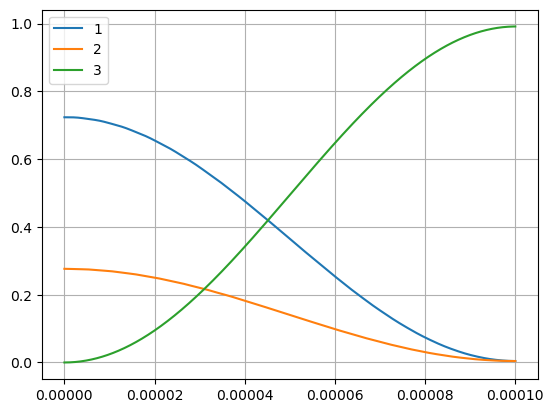

In [10]:
ts, ψs = @time evolve_dressed(sys0, false, 2π * 85e3, 2π * 170e3, 2π * -137e3,
                              _->2π * 22e3 * 0.43, range(0, 100e-6, 1001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
plot(ts, [abs2(ψ.data[3]) for ψ in ψs], label="3")
legend()
grid()

### Off resonant coupling from $100 \mu s$ $\pi$-time Square

  0.131263 seconds (964.74 k allocations: 51.367 MiB, 99.59% compilation time)


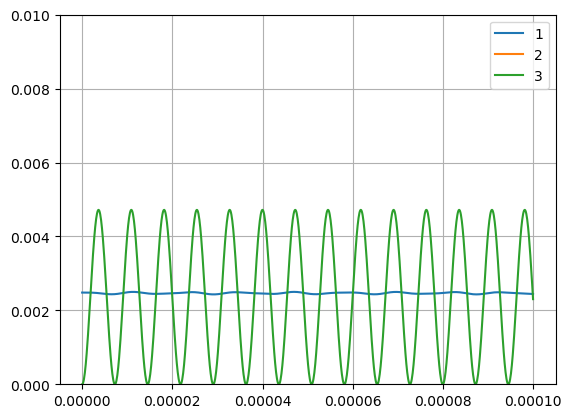

In [11]:
ts, ψs = @time evolve_dressed(sys0, true, 2π * 85e3, 2π * 170e3 * 0.05, 2π * -137e3,
                              _->2π * 22e3 * 0.43, range(0, 100e-6, 1001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
plot(ts, [abs2(ψ.data[3]) for ψ in ψs], label="3")
legend()
ylim([0., 0.01])
grid()

### $40 \mu s$ $\pi$-time Square

  0.172864 seconds (964.28 k allocations: 51.370 MiB, 21.92% gc time, 77.26% compilation time)


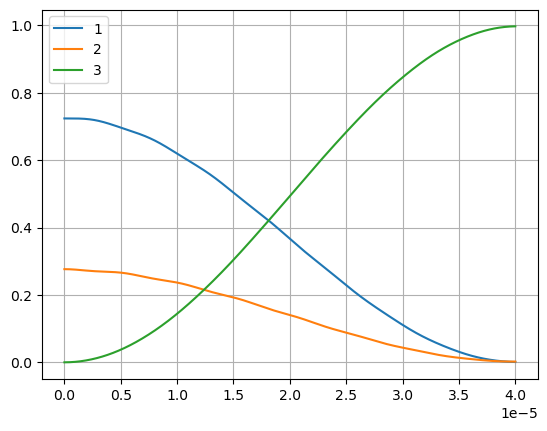

In [12]:
ts, ψs = @time evolve_dressed(sys0, false, 2π * 85e3, 2π * 170e3, 2π * -137e3,
                              _->2π * 55e3 * 0.43, range(0, 40e-6, 1001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
plot(ts, [abs2(ψ.data[3]) for ψ in ψs], label="3")
legend()
grid()

### Off resonant coupling from $40 \mu s$ $\pi$-time Square

  0.131567 seconds (963.02 k allocations: 51.307 MiB, 99.67% compilation time)


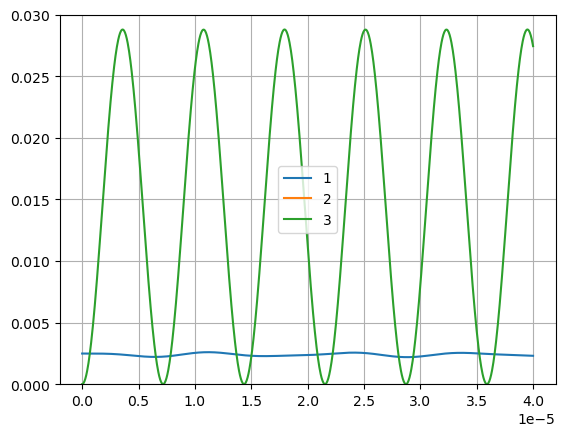

In [13]:
ts, ψs = @time evolve_dressed(sys0, true, 2π * 85e3, 2π * 170e3 * 0.05, 2π * -137e3,
                              _->2π * 55e3 * 0.43, range(0, 40e-6, 1001), alg=Vern9());
plot(ts, [abs2(ψ.data[1]) for ψ in ψs], label="1")
plot(ts, [abs2(ψ.data[2]) for ψ in ψs], label="2")
plot(ts, [abs2(ψ.data[3]) for ψ in ψs], label="3")
legend()
ylim([0., 0.03])
grid()